Описание стенда
===============
- CPU: AMD Ryzen 9 7900X, 12 физических, 24 логических ядра, max 5.733 GHz
- RAM: 128 Gb, 3600 MHz, DDR5
- OS: Ubuntu 22.04 

Подготовка
==========
- Swapfile отключен
- Частота процессора выставлена на максимальную
- Отключены сильно нагружающие систему фоновые приложения
- Перед замерами код выполняется на копиях исходных дизъюнктов 5 раз для "прогрева"
- Процесс прибивается к одному ядру

Детали замеров
==============
- CNF: `./data/jnf301.cnf`, $100$ переменных, $900$ дизъюнктов
- Замеряется только выполнение `dpll()`, работа с файловой системой и выводом - нет
- Для замеров используется вызов `clock_gettime(CLOCK_MONOTONIC)` из `<time.h>`
- Выборка размером $40$, убран $1$ выброс

In [1]:
t=[3230.547399,
 3230.14237,
 3230.853501,
 3229.440899,
 3229.85792,
 3228.897526,
 3229.177126,
 3230.86841,
 3229.948812,
 3231.219325,
 3229.134686,
 3229.093669,
 3229.31105,
 3231.93268,
 3230.952729,
 3229.690912,
 3229.875734,
 3230.629926,
 3230.19512,
 3230.424456,
 3230.025488,
 3230.286403,
 3231.01104,
 3232.747988,
 3232.625016,
 3233.145164,
 3230.84268,
 3231.013824,
 3232.097955,
 3231.831147,
 3227.694611,
 3228.141388,
 3230.538733,
 3229.935907,
 3229.633843,
 3228.458872,
 3225.329077,
 3227.727341,
 3227.332382,
 3228.941879,
 3228.013777,
 3228.187616,
 3229.155926,
 3229.328613,
 3229.157709,
 3228.448162,
 3227.627883,
 3226.524757,
 3227.565896,
 3227.678479,
 3228.990862,
 3228.281044,
 3229.855083,
 3230.164952,
 3228.932391,
 3228.890391,
 3227.700381,
 3228.211882,
 3227.65837]

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

(array([ 1.,  1.,  4., 10., 11., 10.,  9.,  7.,  3.,  3.]),
 array([3225.329077 , 3226.1106857, 3226.8922944, 3227.6739031,
        3228.4555118, 3229.2371205, 3230.0187292, 3230.8003379,
        3231.5819466, 3232.3635553, 3233.145164 ]),
 <BarContainer object of 10 artists>)

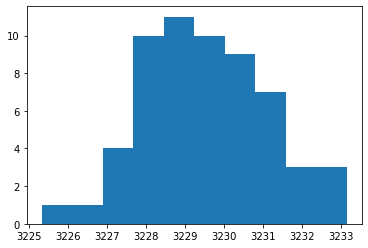

In [3]:
plt.hist(t)

In [4]:
stats.normaltest(t)

NormaltestResult(statistic=0.19803954872813387, pvalue=0.9057247977145721)

In [5]:
stats.shapiro(t)

ShapiroResult(statistic=0.9884661436080933, pvalue=0.8495122790336609)

Оба $pvalue > 0.05$, данные проходят тесты на нормальность

Среднее

In [6]:
np.mean(t)

3229.5242230847457

Стандартное отклонение

In [7]:
np.std(t, ddof=1)

1.565736100414736

Стандартное отклонение среднего

In [8]:
np.std(t, ddof=1)/math.sqrt(len(t))

0.2038414777963564

Доверительный интервал

In [9]:
stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)

0.40803304986798783

Результаты
- Погрешность - $2 ms$
- Среднее - $3229 ms$
